# Homework 4

## Akshay Prakash

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [4]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [5]:
df = pd.read_csv('nyc-taxi-data.csv.bz2', header = None)

## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe).
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [6]:
header = ["taxi_id", "driver_id",
          "pickup_datetime", "dropoff_datetime", 
          "trip_time(seconds)", "trip_distance(miles)", 
          "pickup_longitude", "pickup_latitude", 
          "dropoff_longitude", "dropoff_latitude", 
          "payment_type", "fare_amount", "surcharge", "mta_tax", "tip_amount", "tolls_amount", 
          "total_amount"]

df.columns = header
df.head()

,taxi_id,driver_id,pickup_datetime,dropoff_datetime,trip_time(seconds),trip_distance(miles),pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.0,0.0,4.5
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.0,0.0,27.5
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.0,0.0,5.0
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.0,0.0,5.0
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.0,0.0,5.0


In [7]:
df.drop(df[(df["trip_distance(miles)"] < 1) | (df["total_amount"] > 20)].index, inplace = True)

Although tips and tolls do not have affect the fare amount, they will have a confounding impact on determining the relationship between trip distance and total amount if included.

In [8]:
df_no_tips_tolls = df.drop(df[(df["tip_amount"] != 0 )| (df["tolls_amount"] != 0) ].index)

Inserting a new column that describes the trip time in minutes. Allows for a more readily interpreted fare ($/minutes).

In [9]:
df.insert(5, "trip_time(minutes)" , df["trip_time(seconds)"] / 60 )
df_no_tips_tolls.insert(5, "trip_time(minutes)" ,df["trip_time(seconds)"] / 60 )

## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

In [10]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='trip_distance(miles)', ylabel='trip_distance(miles)'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='trip_distance(miles)'>,
        <AxesSubplot:xlabel='trip_time(minutes)', ylabel='trip_distance(miles)'>],
       [<AxesSubplot:xlabel='trip_distance(miles)', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='trip_time(minutes)', ylabel='fare_amount'>],
       [<AxesSubplot:xlabel='trip_distance(miles)', ylabel='trip_time(minutes)'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='trip_time(minutes)'>,
        <AxesSubplot:xlabel='trip_time(minutes)', ylabel='trip_time(minutes)'>]],
      dtype=object)

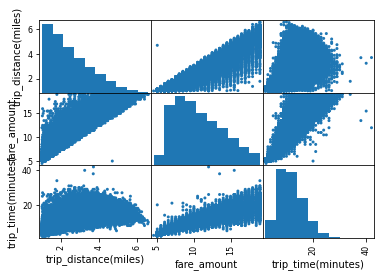

In [11]:
scatter_matrix(df[{"trip_distance(miles)","trip_time(minutes)","fare_amount"}], alpha = 1)

In [12]:
df[{"trip_distance(miles)","trip_time(minutes)","fare_amount"}].corr()

,trip_distance(miles),fare_amount,trip_time(minutes)
trip_distance(miles),1.000000,0.919445,0.642950
fare_amount,0.919445,1.000000,0.873728
trip_time(minutes),0.642950,0.873728,1.000000


    trip_distance(miles) vs trip_time(minutes) does not appear to have much correlation. Perhaps a weak positive correlation exists, but the data is quite spread.  

    trip_distance(miles) vs fare_amount demonstrates a strong positive correlation beteween the two features.  

    trip_time(minutes) vs fare_amount also demonstrates a relatively strong positive correlation between the two features.

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 



In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
distance = df["trip_distance(miles)"]
fare = df["fare_amount"]

In [15]:
x_var = np.vstack((distance, )).T

In [16]:
reg = LinearRegression().fit(x_var, fare)

print("{:.3f}".format(reg.coef_[0]))

2.812


    Fare Amount ($) = 2.812 ($/mile) * Trip Distance (miles) + 3.72($)

In [17]:
print("The predicted fare for a three-mile trip is ${:.2f}".format(2.812 * 3 + 3.723))

The predicted fare for a three-mile trip is $12.16


## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, travel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

In [18]:
distance = df_no_tips_tolls["trip_distance(miles)"]
duration = df_no_tips_tolls["trip_time(minutes)"]

In [19]:
x_var_2 = np.vstack((distance,duration, )).T

In [20]:
reg_md = LinearRegression().fit(x_var_2, df_no_tips_tolls["total_amount"])

In [21]:
print("{:.3f} & {:.3f}".format(reg_md.coef_[0],reg_md.coef_[1]))

1.880 & 0.350


In [22]:
reg_md.intercept_

3.081284097565069

    Total Amount ($) = [1.880($/mile) * Trip Distance(miles)] + [0.350($/minute) * Trip Duration(minutes)] + $3.08

In [26]:
reg_md.predict(np.array([3, 6]).reshape(1,-1))

array([10.82073375])

## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs 
* Provide the Regression Coefficients of your model after stop or convergance. 

In [20]:
x = df["trip_distance(miles)"].to_numpy()
y = df["fare_amount"].to_numpy()

(1.0, 6.58)

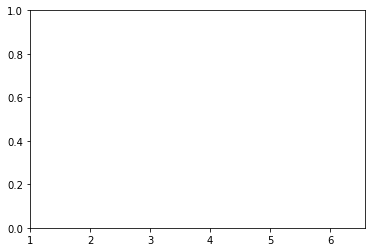

In [21]:
fig, ax = plt.subplots()

ax.set_xlim(left = np.min(x), right = np.max(x))

In [22]:
b_current = 0 
m_current = 0

learningRate = 0.02
num_iteration = 400 

precision = 0.1


previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

#ax2.set_xlim(left = 0, right=num_iteration)
ax.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    
    print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

    print("m = ", m_current, " b=", b_current)



Sample size 31407.0
Iteration No.= 0  m =  0.5936016716018707  b= 0.21291527366510654  Cost= 124.90017352819436
m =  0.5936016716018707  b= 0.21291527366510654
Iteration No.= 1  m =  1.0901205851753482  b= 0.3923510348414192  Cost= 88.36842705000767
m =  1.0901205851753482  b= 0.3923510348414192
Iteration No.= 2  m =  1.5053684087534216  b= 0.5437559630328396  Cost= 62.764723015621115
m =  1.5053684087534216  b= 0.5437559630328396
Iteration No.= 3  m =  1.8525817965299534  b= 0.6716914037695223  Cost= 44.81952966180947
m =  1.8525817965299534  b= 0.6716914037695223
Iteration No.= 4  m =  2.142841742887519  b= 0.7799758753961334  Cost= 32.24152093376541
m =  2.142841742887519  b= 0.7799758753961334
Iteration No.= 5  m =  2.3854246425027115  b= 0.8718060421994718  Cost= 23.424908744955655
m =  2.3854246425027115  b= 0.8718060421994718
Iteration No.= 6  m =  2.588096178539113  b= 0.9498579864510429  Cost= 17.244338011856872
m =  2.588096178539113  b= 0.9498579864510429
Iteration No.= 7  m